## Movie Review Sentiment Analysis - The Lion King (2019) EDA and Visualization

## Agenda
    - Data Extraction (Web-scrapping)
    - Visualization
    - Regular Expression for special character removal
    - Removal of accented characters and expanding contractions
    - Tokenisation
    - Stop Word Removal
    - Stemming and Lemmatization
    - TF-IDF Matrix
    - Clustering
    - SVD using scikitlearn

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import time

import re

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data Extraction/ Web scrapping
------
#### NOTE: Time to execute below chunk = 25 min
#### Load from local file 'data_0.csv'

In [2]:
data=pd.read_csv('data_0.csv')
data.head()

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
0,2019-08-18T14:14:07.734Z,NaN,Jesse S,True,False,False,False,STAR_4,"This movie is good. The original, animated ver...",4.0,27m ago,2019-08-18T14:14:07.734Z,{'userId': 'D91306B7-6A67-4117-B384-6A35AF00C1...
1,2019-08-18T14:03:41.247Z,NaN,Shae C,False,False,False,True,STAR_4,Followed the original story which I was skepti...,4.0,38m ago,2019-08-18T14:03:41.247Z,{'userId': 'ff222e0c-e396-4d62-9e6a-82529303cb...
2,2019-08-18T13:29:32.874Z,https://graph.facebook.com/v3.3/6212197/picture,Scott W,False,False,False,False,STAR_3,"Unlike some other Disney remakes, this one is ...",3.0,1h ago,2019-08-18T13:29:32.874Z,"{'userId': '798014537', 'realm': 'RT', 'displa..."
3,2019-08-18T13:23:58.374Z,NaN,William S,False,False,False,True,STAR_5,Loved the movie!! The music was and is great!!...,5.0,1h ago,2019-08-18T13:23:58.374Z,{'userId': 'c64b8b43-5e68-41be-b3ec-89b41ec767...
4,2019-08-18T13:22:09.835Z,NaN,Kristy,False,False,False,True,STAR_4_5,It was a well made movie. I,4.5,1h ago,2019-08-18T13:22:09.835Z,{'userId': '685f2a19-f581-43a6-bdbd-6db9e12a14...


In [3]:
# headers = {
# 'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
# 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
# 'X-Requested-With': 'XMLHttpRequest',
# }

# url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'
# s = requests.Session() # A Requests session. Provides cookie persistence, connection-pooling, and configuration.

In [4]:
# start_time = time.time()
# data = pd.DataFrame()  #initializing empty dataframe, payload parameter values
# end = ''
# start = ''

# for i in list(range(1,301)):
#     payload = {
#     'direction': 'next',
#     'endCursor': end,
#     'startCursor': start,
#     }
#     r = s.get(url, headers=headers, params=payload) # GET Call. Sends a GET request. Returns :class:`Response` object.
#     data= data.append(r.json()['reviews'], ignore_index=True)   #append Review info to dataframe
#     end=r.json()['pageInfo']['endCursor']    # update 'start' key for new page
#     time.sleep(5)
# print('Web scrap completed in %s s' % (str(time.time()-start_time)))    

# Store to Data local to local file
# data.to_csv('data.csv', index=False)

Data Pre-processing and EDA
---------

In [5]:
data.shape

(3000, 13)

In [6]:
data.dtypes

createDate           object
displayImageUrl      object
displayName          object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
user                 object
dtype: object

In [7]:
data.describe()

,score
count,3000.000000
mean,3.919667
std,1.316672
min,0.500000
25%,3.000000
50%,4.500000
75%,5.000000
max,5.000000


In [8]:
data.describe(exclude='float64')

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,timeFromCreation,updateDate,user
count,3000,222,2861,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,222,2464,2,2,2,2,10,2995,43,3000,3000
top,2019-08-14T02:01:17.774Z,https://graph.facebook.com/v3.3/22885628014073...,Google,False,False,False,True,STAR_5,I loved everything about the movie.,"Aug 05, 2019",2019-08-14T02:01:17.774Z,{'userId': 'DD2453B0-37CE-4B47-A099-D15378FC31...
freq,1,1,14,2967,2998,2999,2165,1369,2,318,1,1


In [9]:
import ast
data['userId'] = data['user'].apply(lambda x: ast.literal_eval(x)['userId'])  # string literal evaluation --> Data structure (dictionary)

In [10]:
data.describe(exclude='float64')

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,timeFromCreation,updateDate,user,userId
count,3000,222,2861,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,222,2464,2,2,2,2,10,2995,43,3000,3000,3000
top,2019-08-14T02:01:17.774Z,https://graph.facebook.com/v3.3/22885628014073...,Google,False,False,False,True,STAR_5,I loved everything about the movie.,"Aug 05, 2019",2019-08-14T02:01:17.774Z,{'userId': 'DD2453B0-37CE-4B47-A099-D15378FC31...,c8a93a1e-4729-4fc9-9143-8b2353430558
freq,1,1,14,2967,2998,2999,2165,1369,2,318,1,1,1


In [11]:
# Setting 'userId' as Index
data.set_index('userId', inplace=True)
data.head()

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
userId,,,,,,,,,,,,,
D91306B7-6A67-4117-B384-6A35AF00C176,2019-08-18T14:14:07.734Z,NaN,Jesse S,True,False,False,False,STAR_4,"This movie is good. The original, animated ver...",4.0,27m ago,2019-08-18T14:14:07.734Z,{'userId': 'D91306B7-6A67-4117-B384-6A35AF00C1...
ff222e0c-e396-4d62-9e6a-82529303cb75,2019-08-18T14:03:41.247Z,NaN,Shae C,False,False,False,True,STAR_4,Followed the original story which I was skepti...,4.0,38m ago,2019-08-18T14:03:41.247Z,{'userId': 'ff222e0c-e396-4d62-9e6a-82529303cb...
798014537,2019-08-18T13:29:32.874Z,https://graph.facebook.com/v3.3/6212197/picture,Scott W,False,False,False,False,STAR_3,"Unlike some other Disney remakes, this one is ...",3.0,1h ago,2019-08-18T13:29:32.874Z,"{'userId': '798014537', 'realm': 'RT', 'displa..."
c64b8b43-5e68-41be-b3ec-89b41ec767e4,2019-08-18T13:23:58.374Z,NaN,William S,False,False,False,True,STAR_5,Loved the movie!! The music was and is great!!...,5.0,1h ago,2019-08-18T13:23:58.374Z,{'userId': 'c64b8b43-5e68-41be-b3ec-89b41ec767...
685f2a19-f581-43a6-bdbd-6db9e12a14fc,2019-08-18T13:22:09.835Z,NaN,Kristy,False,False,False,True,STAR_4_5,It was a well made movie. I,4.5,1h ago,2019-08-18T13:22:09.835Z,{'userId': '685f2a19-f581-43a6-bdbd-6db9e12a14...


In [12]:
data.drop(['displayName','displayImageUrl','hasProfanity','hasSpoilers','rating','isSuperReviewer',
           'isVerified','timeFromCreation','updateDate','user',],
          axis=1,inplace=True)

data.columns

Index(['createDate', 'review', 'score'], dtype='object')

In [13]:
data.head()

,createDate,review,score
userId,,,
D91306B7-6A67-4117-B384-6A35AF00C176,2019-08-18T14:14:07.734Z,"This movie is good. The original, animated ver...",4.0
ff222e0c-e396-4d62-9e6a-82529303cb75,2019-08-18T14:03:41.247Z,Followed the original story which I was skepti...,4.0
798014537,2019-08-18T13:29:32.874Z,"Unlike some other Disney remakes, this one is ...",3.0
c64b8b43-5e68-41be-b3ec-89b41ec767e4,2019-08-18T13:23:58.374Z,Loved the movie!! The music was and is great!!...,5.0
685f2a19-f581-43a6-bdbd-6db9e12a14fc,2019-08-18T13:22:09.835Z,It was a well made movie. I,4.5


### Feature Engineering

1. Convert *score* --> **sentiment**:\
    i. if score > 3, **sentiment** = 0 [POSITIVE Review]\
    ii. if score =< 3, **sentiment** = 1 [NEGATIVE Review]\

2. Organize *createDate* --> **date**, **time**

**NOTE**: our Target Level for prediction is Negative Review.

In [1]:
# Predic
data['sentiment'] = data['score'].apply(lambda x: 0 if x>3 else 1)
data.describe()

NameError: name 'data' is not defined

In [15]:
print('Count of Review Sentiments:\n')
print(data['sentiment'].value_counts(),'\n')

print('Frequency % of Review Sentiments:\n')
print(data['sentiment'].value_counts(normalize=True)*100)   # <30% of All reviews are Negative

Count of Review Sentiments:

0    2170
1     830
Name: sentiment, dtype: int64 

Frequency % of Review Sentiments:

0    72.333333
1    27.666667
Name: sentiment, dtype: float64


In [16]:
data.drop('score', axis=1,inplace=True)
data.head()

,createDate,review,sentiment
userId,,,
D91306B7-6A67-4117-B384-6A35AF00C176,2019-08-18T14:14:07.734Z,"This movie is good. The original, animated ver...",0
ff222e0c-e396-4d62-9e6a-82529303cb75,2019-08-18T14:03:41.247Z,Followed the original story which I was skepti...,0
798014537,2019-08-18T13:29:32.874Z,"Unlike some other Disney remakes, this one is ...",1
c64b8b43-5e68-41be-b3ec-89b41ec767e4,2019-08-18T13:23:58.374Z,Loved the movie!! The music was and is great!!...,0
685f2a19-f581-43a6-bdbd-6db9e12a14fc,2019-08-18T13:22:09.835Z,It was a well made movie. I,0


In [17]:
from datetime import datetime as dt

data['createDate'] = pd.to_datetime(data['createDate'], infer_datetime_format=True)
data['date'] = data['createDate'].dt.date  # Date of review
data['time'] = data['createDate'].dt.time  # Time of review
data['weekday'] = data['createDate'].dt.weekday  #weekday number : Monday=0, Sunday=6

In [18]:
data['weekday'].value_counts()

0    476
3    474
6    473
5    460
4    445
1    369
2    303
Name: weekday, dtype: int64

In [19]:
data.dtypes

createDate    datetime64[ns, UTC]
review                     object
sentiment                   int64
date                       object
time                       object
weekday                     int64
dtype: object

In [20]:
data.describe(exclude='int64')

,createDate,review,date,time
count,3000,3000,3000,3000
unique,3000,2995,18,3000
top,2019-08-17 22:04:48.038000+00:00,I loved everything about the movie.,2019-08-05,17:17:56.926000
freq,1,2,318,1
first,2019-08-01 14:44:38.298000+00:00,NaN,NaN,NaN
last,2019-08-18 14:14:07.734000+00:00,NaN,NaN,NaN


In [21]:
data.drop('createDate', axis=1,inplace=True)  #Drop original Datetime variable
data.dtypes

review       object
sentiment     int64
date         object
time         object
weekday       int64
dtype: object

In [22]:
# Reviews begin on  1st August 2018, collected till 18th August 2018
x = data['date'].value_counts().sort_index().index.values
y = data['date'].value_counts().sort_index().values
print(pd.DataFrame({'Date':x,'Review Count': y}).head(),'\n')
print(pd.DataFrame({'Date':x,'Review Count': y}).tail(),)

         Date  Review Count
0  2019-08-01           152
1  2019-08-02           252
2  2019-08-03           258
3  2019-08-04           294
4  2019-08-05           318 

          Date  Review Count
13  2019-08-14           107
14  2019-08-15            93
15  2019-08-16            67
16  2019-08-17            88
17  2019-08-18            46


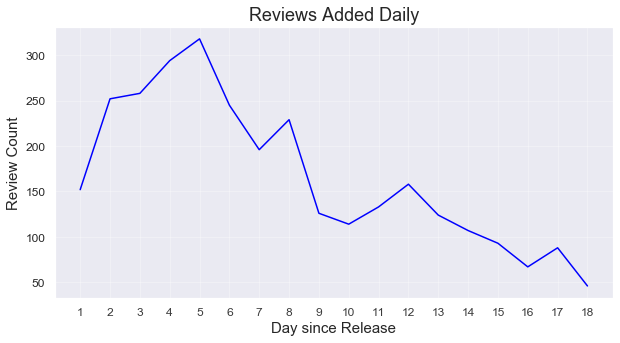

In [23]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})
    plt.plot(list(range(1,19)),y, color='blue')    
    plt.xlabel('Day since Release', fontsize=15)
    plt.ylabel('Review Count', fontsize=15)
    xtick_location = list(range(1,19))
    xtick_labels = list(range(1,19))
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.yticks(fontsize=12,)
    plt.title("Reviews Added Daily", fontsize=18)
    plt.grid(axis='both', alpha=.3)
    plt.show()
    
# Plot shows a Rise in Reviews during initial weeks, followed by a decline post Day 7

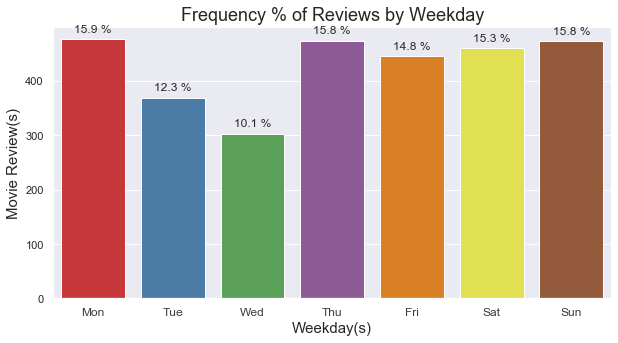

In [24]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})

    g = sns.countplot(x='weekday', data=data, palette='Set1', saturation=0.7)
    v_list = [str(round(i,1))+' %' for i in (data['weekday'].value_counts(normalize=True)*100).sort_index()]

    for v, p in zip(v_list, g.patches):   # Annotate the point 'xy' with Frequency%
            g.annotate(v, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',\
                       xytext = (0, 10), textcoords = 'offset points')
    xtick_location = list(range(0,7))
    xtick_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']    
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.xlabel('Weekday(s)',fontsize=15)
    plt.ylabel('Movie Review(s)',fontsize=15)
    plt.title('Frequency % of Reviews by Weekday', fontsize=18)
    plt.show()

# Shows a dip in reviews(viewership) on Tuesday and Wednesdays

In [25]:
# Trend of Positive and Negative Reviews grouped by Weekday(s)

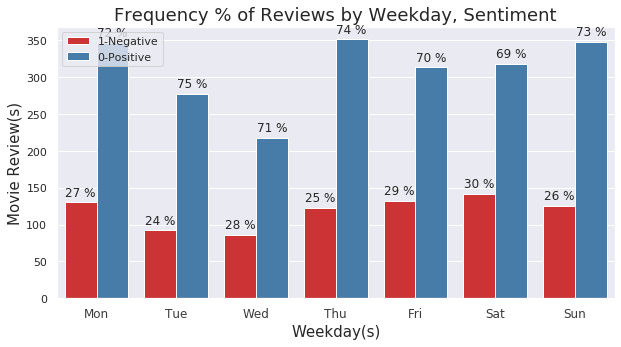

In [26]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})
    g = sns.countplot("weekday", data=data, hue='sentiment',hue_order=[1,0], palette='Set1')    
    v_list = [str(int(i))+' %' for i in data.groupby('weekday')['sentiment'].value_counts(normalize=True)*100]
    v_1 = [y for x,y in enumerate(v_list) if x%2==0] # Frequency% of Positive Review(s)
    v_2 = [y for x,y in enumerate(v_list) if x%2!=0]  # Frequency% of Negative Review(s)
    v_list = v_2+v_1
    for v, p in zip(v_list, g.patches):   # Annotate the point 'xy' with Frequency%
        g.annotate(v, (p.get_x() + p.get_width() / 2., 
                       p.get_height()), ha='center', va='center', xytext = (0, 10), textcoords = 'offset points')
    xtick_location = list(range(0,7))
    xtick_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.xlabel('Weekday(s)',fontsize=15)
    plt.ylabel('Movie Review(s)',fontsize=15)
    plt.title('Frequency % of Reviews by Weekday, Sentiment', fontsize=18)
    g.legend(['1-Negative', '0-Positive'], loc=0)

#### Calendar Heat Map of Count of Negative Review(s) over 18 days of Available data

In [27]:
# Preparing Dateframe for Calendar Heat Map
neg_review=data[data['sentiment']>0].groupby('date')['sentiment'].value_counts()  # Count of Negative Reviews
data_cmap = pd.DataFrame(data={'neg_review':neg_review})
data_cmap.index = data_cmap.index.droplevel(1)  # Drop Second Index level
index=list(data_cmap.index.values)
index = [np.datetime64(i) for i in index]   # converting timestamp to np.datetime64()
data_cmap.index = index
data_cmap.head()  # Date indexed Dataframe

,neg_review
2019-08-01,37
2019-08-02,79
2019-08-03,85
2019-08-04,70
2019-08-05,87


<Figure size 1280x800 with 0 Axes>

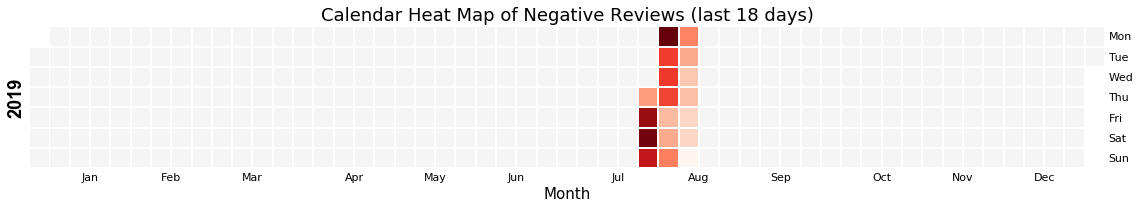

In [30]:
# !pip install calmap
import calmap

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(data=data_cmap['2019']['neg_review'] ,fig_kws={'figsize': (16,10)},\
                    yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Calendar Heat Map of Negative Reviews (last 18 days)', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.show()

**NOTE:** The First 7 days had the largest contribution of Negative Reviews ()

In [31]:
data.dtypes

review       object
sentiment     int64
date         object
time         object
weekday       int64
dtype: object

In [32]:
# Dropping 'date', 'time' info
data.drop(['date','time','weekday'], axis=1, inplace=True)
data.head()

,review,sentiment
userId,,
D91306B7-6A67-4117-B384-6A35AF00C176,"This movie is good. The original, animated ver...",0
ff222e0c-e396-4d62-9e6a-82529303cb75,Followed the original story which I was skepti...,0
798014537,"Unlike some other Disney remakes, this one is ...",1
c64b8b43-5e68-41be-b3ec-89b41ec767e4,Loved the movie!! The music was and is great!!...,0
685f2a19-f581-43a6-bdbd-6db9e12a14fc,It was a well made movie. I,0


Text Preprocessing
--------

In [33]:
data.dtypes

review       object
sentiment     int64
dtype: object

In [38]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

import re
import random
random.seed(123)

In [39]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

original_data = data.copy()
print(data.keys())
print(original_data.keys())

Index(['review', 'sentiment'], dtype='object')
Index(['review', 'sentiment'], dtype='object')


### LowerCase all text

In [40]:
data['review'] = [text.strip().lower() for text in data['review']]  # remove Trailing/Leading whitespaces
data['review'][:10]

userId
D91306B7-6A67-4117-B384-6A35AF00C176    this movie is good. the original, animated ver...
ff222e0c-e396-4d62-9e6a-82529303cb75    followed the original story which i was skepti...
798014537                               unlike some other disney remakes, this one is ...
c64b8b43-5e68-41be-b3ec-89b41ec767e4    loved the movie!! the music was and is great!!...
685f2a19-f581-43a6-bdbd-6db9e12a14fc                          it was a well made movie. i
db558a10-7aa3-4980-919c-2e786dbf619d    they took all of the puns out!! they took the ...
601D3E10-C29D-426E-AF31-E04DF16BD3F2    loved it! i am a huge fan of the original so i...
A9AF03F3-CD14-48EA-8506-56363CE41AB6    honestly, the cartoon is better due to the ani...
0c7e063e-0e2d-4b4a-8a9c-ed8249e4db07    stayed true to original story.  liked that mid...
61c1b34d-1c98-4f19-a1f5-b07707551baa    i thought this was awesome. i enjoyed all the ...
Name: review, dtype: object

In [41]:
# eg of 'review' to preprocess
data['review'][100]

"i enjoyed this film very much. the cgi in this film is incredible and it does a good job at adapting a classic. there are some things that make the animated film better but you really can't compare an animated film to a cgi one especially cgi done to look real. this is not easy to achieve folks where as animators draw these(cgi) effects take months if not years to create a realistic image"

### Removal/Replacement of: Contractions, Accented Characters, Symbols/Markdown Characters
**Contraction-Expansion Map:**

In [42]:
CONTRACTION_MAP = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have",
"couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have",
"he'll": "he will", "he'll've": "he will have", "he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
"I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is",
"there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not",
"we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",
"what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is",
"when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have",
"who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
"would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
}

In [43]:
# from contractions import CONTRACTION_MAP
import unicodedata

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    # Create 're' object by re.compile(pattern, repl, string)    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    # re.IGNORECASE : Make search case-insensiitive
    # re.DOTALL: Make the '.' special character match any character at all, including a newline
    
    # To Expand the Contracted Words
    def expand_match(contraction):
        match = contraction.group(0)        
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        return expanded_contraction   # match, 'replaced by -->',expanded_contraction
        
    # string substitution: regex.sub(replacement, subject)    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub(pattern="'", repl="", string=expanded_text)  # Remove apostrophe
    return expanded_text   # Returns expanded text

In [44]:
# Removes accented characters and emojis too
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [45]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii, non-Words and Digits/Numerals
    text = re.sub("(\\W|\\d)",' ',text)  # \W: non-alphanumeric character, \d: decimal digit
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)  # \n: newline char, \w: any alphanumeric character, 
                  # *: matches zero or more occurrences, ?: matches Zero or One occurrence of the pattern left to it.
                  # (a|b|c)xz: group sub-patterns to match, [abc]: set of characters to match, \s: whitespace 
                  # |: is used for alternation a|b
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [46]:
# Test: expand_contractions()
txt = "They aren't sick, you shouldn't worry!"
print(expand_contractions(txt),'\n')

# Test: remove_accented_chars()
txt = 'Demain, dès l’aube, à l’heure où blanchit la campagne, Je partirai. J’irai par la forêt, j’irai par la montagne.'
print('Non-Accented Text:',remove_accented_chars(txt),'\n')

# Test: scrub_words()
txt = "Love, Love, \n\n\t, Love this movie!!😍😍😍❤️❤️❤️,&*(@)$&Lion King is the best#(@#$)"
print('Scrubbed Text:',scrub_words(txt))

They are not sick, you should not worry! 

Non-Accented Text: Demain, des laube, a lheure ou blanchit la campagne, Je partirai. Jirai par la foret, jirai par la montagne. 

Scrubbed Text: Love  Love       Love this movie                   Lion King is the best      


In [47]:
print('Average Review length:', np.mean([len(i) for i in data['review']]))

Average Review length: 146.767


#### Invoking the above defined functions

In [48]:
# data['review']= [expand_contractions(re.sub('’', "'", text)) for text in data['review']]
data['review'] = data['review'].apply(lambda x: expand_contractions(re.sub('’', "'", x)))

In [49]:
# Apply remove_accented_chars()
data['review'] = data['review'].apply(lambda x: remove_accented_chars(re.sub('’', "'", x)))

In [50]:
# Apply scrub_words()
data['review'] = data['review'].apply(lambda x: scrub_words(re.sub('’', "'", x)))

#### Checking the integrity of the data after initial preprocessing steps

In [51]:
print(len(data['review']))
print(len(original_data['review']),'\n')

print('Original Text:', original_data['review'][2784])
print("-"*20)
print('Processed Text:',data['review'][2784])

3000
3000 

Original Text: an absolutely must see!  we loved it! so sweet and funny.  the cinematography is amazing!
--------------------
Processed Text: an absolutely must see   we loved it  so sweet and funny   the cinematography is amazing 


### Adding new column "word_count" which specifies the number of tokens in each document

In [52]:
data['word_count'] = data['review'].apply(lambda x: len(x.split(' ')))  # tokenize words separated by single space
data[['review','word_count']].iloc[1000:1005,:]

,review,word_count
userId,,
9cdba29f-26eb-44c5-9d1e-3b8323390a15,i really liked it i really thought some of the...,84
98A92FDA-4AAA-45ED-BB92-7477097106C1,technically beautiful but emotionally flat an...,29
03ABAEDF-8D6A-47E1-B83A-79F2288327A8,i enjoyed the whole movie it took me back to ...,43
7246C5FC-F9D7-4C93-80ED-19A81A9E253F,it was ahhhhhmazing there were times i wan...,32
E6FCDE5C-D042-424D-866F-FE86FE7FBA9C,loved the movie it was great,10


In [53]:
print('Mean Review Length:',data['word_count'].mean())
print('Minimum Review Length:',data['word_count'].min())
print('Max Review Length:',data['word_count'].max())

Mean Review Length: 31.346
Minimum Review Length: 2
Max Review Length: 891


### Lemmatization, Stemming, Tokenization and Stopwords.

In [54]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
# stopwords.remove('no')
# stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['be', 'rather', 'her', 'moreover', 'seeming', 'something', "'s", 'fifteen', 'must', 'everywhere']


In [55]:
len(stopwords)  # stopwords is a set()

326

In [56]:
## Adding Custom stopwords to the spacy stopword list
for w in stopwords:
    nlp.vocab[w].is_stop = True

In [57]:
## Use NLTK for stemming.
## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [58]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
        
    #print(tokens[:5])
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    #print("ended re.search")
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    #print("Completed tokenization")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    #print("ended re.search")
    lemma = [t.lemma_ for t in filtered_tokens]
    #print("returning lemms")
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

We are trying to create four seperate lists:
1. Clean Review Lemmatized (w/o stopwords)
2. Clean Review Stemmed (w/o stop words)
3. Review Lemmatized (w stopwords)
4. Review Stemmed (w stopwords)

# NOTE: Time to execute below chunk = 503.5 s (9 min)
## Load from local file 'data_txt_preprocessed.csv'

In [59]:
data = pd.read_csv('data_txt_preprocessed.csv', index_col='userId')
# data.head()
import ast
# string literal evaluation --> data structure
data['clean_review_stemmed'] = data['clean_review_stemmed'].apply(lambda x: ast.literal_eval(x))
data['clean_review_lemmatized'] = data['clean_review_lemmatized'].apply(lambda x: ast.literal_eval(x))
data['clean_review_tokenized'] = data['clean_review_tokenized'].apply(lambda x: ast.literal_eval(x))
data['review_stemmed'] = data['review_stemmed'].apply(lambda x: ast.literal_eval(x))
data['review_lemmatized'] = data['review_lemmatized'].apply(lambda x: ast.literal_eval(x))
data['review_tokenized'] = data['review_tokenized'].apply(lambda x: ast.literal_eval(x))

In [60]:
data.iloc[1000:1005,:]

,review,sentiment,word_count,clean_review_stemmed,clean_review_lemmatized,clean_review_tokenized,review_lemmatized,review_stemmed,review_tokenized
userId,,,,,,,,,
9cdba29f-26eb-44c5-9d1e-3b8323390a15,i really liked it i really thought some of the...,0,84,"[like, thought, scene, music, thought, good, c...","[like, think, scene, music, think, good, carto...","[liked, thought, scenes, music, thought, good,...","[i, really, like, -PRON-, i, really, think, so...","[i, realli, like, it, i, realli, thought, some...","[i, really, liked, it, i, really, thought, som..."
98A92FDA-4AAA-45ED-BB92-7477097106C1,technically beautiful but emotionally flat an...,1,29,"[technic, beauti, emot, flat, lack, energi, fu...","[technically, beautiful, emotionally, flat, la...","[technically, beautiful, emotionally, flat, la...","[technically, beautiful, but, emotionally, fla...","[technic, beauti, but, emot, flat, and, lack, ...","[technically, beautiful, but, emotionally, fla..."
03ABAEDF-8D6A-47E1-B83A-79F2288327A8,i enjoyed the whole movie it took me back to ...,0,43,"[enjoy, movi, took, lion, king, favorit, movi,...","[enjoy, movie, take, lion, king, favorite, mov...","[enjoyed, movie, took, lion, king, favorite, m...","[i, enjoy, the, whole, movie, -PRON-, take, -P...","[i, enjoy, the, whole, movi, it, took, me, bac...","[i, enjoyed, the, whole, movie, it, took, me, ..."
7246C5FC-F9D7-4C93-80ED-19A81A9E253F,it was ahhhhhmazing there were times i wan...,0,32,"[ahhhhhmaz, time, want, phone, pictur, real, a...","[ahhhhhmaze, time, want, phone, picture, real,...","[ahhhhhmazing, times, wanted, phone, picture, ...","[-PRON-, be, ahhhhhmaze, there, be, time, i, w...","[it, was, ahhhhhmaz, there, were, time, i, wan...","[it, was, ahhhhhmazing, there, were, times, i,..."
E6FCDE5C-D042-424D-866F-FE86FE7FBA9C,loved the movie it was great,0,10,"[love, movi, great]","[love, movie, great]","[loved, movie, great]","[love, the, movie, -PRON-, be, great]","[love, the, movi, it, was, great]","[loved, the, movie, it, was, great]"


In [61]:
# Vocab List w.o stopwords
clean_vocab_lemmatized = []
clean_vocab_stemmed = []
clean_vocab_tokenized = []

# Vocab List w stopwords
all_vocab_lemmatized = []
all_vocab_tokenized = []

for i,j,k in zip(data['clean_review_lemmatized'],data['clean_review_stemmed'], data['clean_review_tokenized']):
    clean_vocab_lemmatized.extend(i)
    clean_vocab_stemmed.extend(j)
    clean_vocab_tokenized.extend(k)
    
for i,j in zip(data['review_lemmatized'], data['review_tokenized']):
    all_vocab_lemmatized.extend(i)    
    all_vocab_tokenized.extend(j)


In [62]:
print(len(clean_vocab_lemmatized))
print(len(clean_vocab_stemmed))
print(len(clean_vocab_tokenized),'\n')
print(len(all_vocab_lemmatized))
print(len(all_vocab_tokenized))

35727
35727
35727 

80818
80818


In [63]:
print(data['review'][1000],'\n')
print(data['clean_review_lemmatized'][1000],'\n')
print(data['clean_review_stemmed'][1000],'\n')
print(data['review_stemmed'][1000],'\n')
print(data['review_lemmatized'][1000],'\n')

i really liked it i really thought some of the scenes were done really well and the music i thought was just as good as the cartoon  like i really liked the hakuna matata scene and the can you feel the love tonight i though those both sounded really well      overall i really liked it for a disney remake the scenes were more intense than the cartoon especially at the end when simba was fighting scar   

['like', 'think', 'scene', 'music', 'think', 'good', 'cartoon', 'like', 'like', 'hakuna', 'matata', 'scene', 'feel', 'love', 'tonight', 'sound', 'overall', 'like', 'disney', 'remake', 'scene', 'intense', 'cartoon', 'especially', 'end', 'simba', 'fight', 'scar'] 

['like', 'thought', 'scene', 'music', 'thought', 'good', 'cartoon', 'like', 'like', 'hakuna', 'matata', 'scene', 'feel', 'love', 'tonight', 'sound', 'overal', 'like', 'disney', 'remak', 'scene', 'intens', 'cartoon', 'especi', 'end', 'simba', 'fight', 'scar'] 

['i', 'realli', 'like', 'it', 'i', 'realli', 'thought', 'some', 'of'

Text Data Visualization
----------

In [64]:
# Creating Dataframe for tokens in Review's Vocabulary
all_vocab_frame = pd.DataFrame({'words': all_vocab_tokenized}, index = all_vocab_lemmatized)
print ('There are ' + str(all_vocab_frame.shape[0]) + ' words in all_vocab_frame')

clean_vocab_frame = pd.DataFrame({'words': clean_vocab_tokenized}, index = clean_vocab_lemmatized)
print ('There are ' + str(clean_vocab_frame.shape[0]) + ' words in clean_vocab_frame')

There are 80818 words in all_vocab_frame
There are 35727 words in clean_vocab_frame


### Plotting Most frequent words before and after stopword removal

In [65]:
values, counts = np.unique(clean_vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [66]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[2521 2726 1729 ... 1941 1926 4435]
[4158 2187 4530 ... 2076 2117 4692]


In [67]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

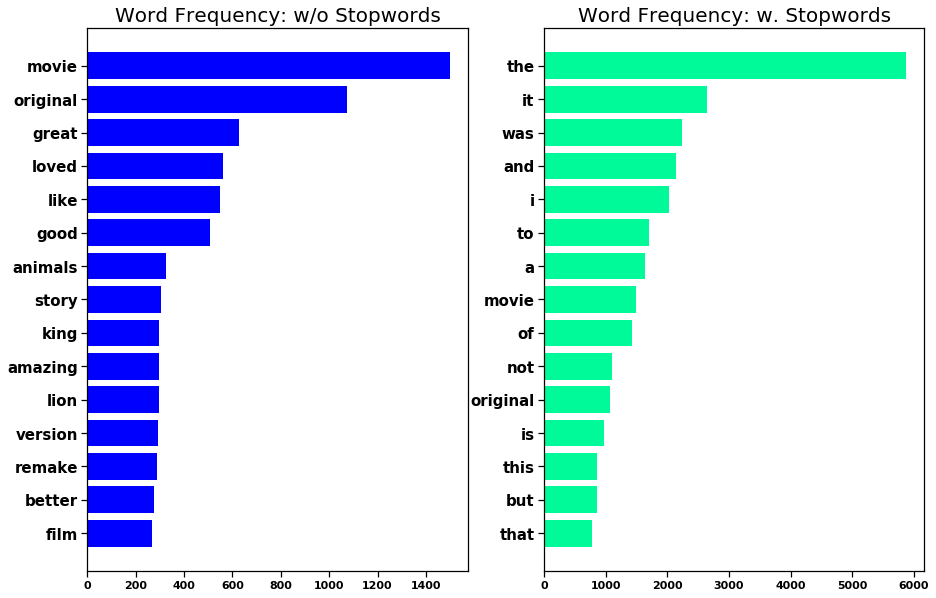

In [68]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold'}
plt.rc('font', **font)
plt.figure(figsize=(15,10))

# Frequency plot of words w/o stopwords
plt.subplot(1,2,1)
plt.barh(values[:15], counts[:15], color='blue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w/o Stopwords', fontsize=20)


# Frequency plot of words with stopwords
plt.subplot(1,2,2)
plt.barh(all_values[:15], all_counts[:15], color='mediumspringgreen')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w. Stopwords', fontsize=20)

plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different.\
2) Words in graph 1 (without stopwords) better describes the themes within the Reviews written

### Wordcloud of Review words (Lemmatized)

In [69]:
# Word Cloud string
clean_review_wordcloud=[]
for i in data['clean_review_lemmatized']:
    clean_review_wordcloud+=i
clean_string = " ".join(clean_review_wordcloud)

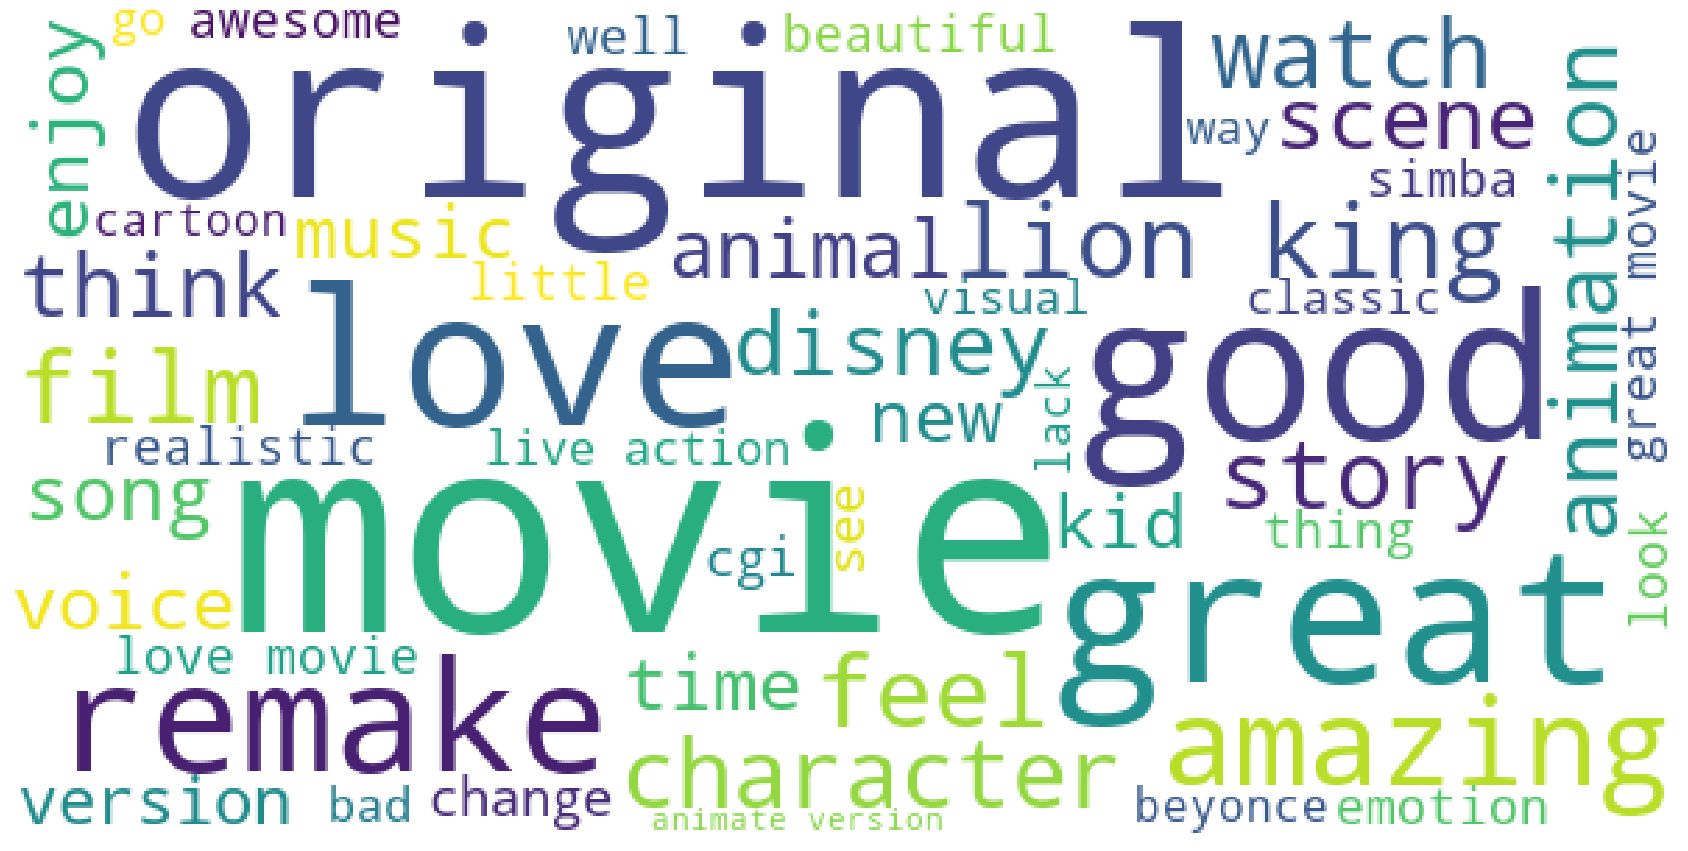

In [71]:
# !pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, width = 600,height=300,max_words=50, background_color="white").generate(clean_string)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,50))
plt.imshow(wordcloud)
plt.axis(False)
plt.show()

### Word Frequency by Sentimentiment Groups

In [72]:
data.head(2)

,review,sentiment,word_count,clean_review_stemmed,clean_review_lemmatized,clean_review_tokenized,review_lemmatized,review_stemmed,review_tokenized
userId,,,,,,,,,
D91306B7-6A67-4117-B384-6A35AF00C176,this movie is good the original animated ver...,0,86,"[movi, good, origin, anim, version, place, hea...","[movie, good, original, animate, version, plac...","[movie, good, original, animated, version, pla...","[this, movie, be, good, the, original, animate...","[this, movi, is, good, the, origin, anim, vers...","[this, movie, is, good, the, original, animate..."
ff222e0c-e396-4d62-9e6a-82529303cb75,followed the original story which i was skepti...,0,12,"[follow, origin, stori, skeptic, enjoy]","[follow, original, story, skeptical, enjoy]","[followed, original, story, skeptical, enjoyed]","[follow, the, original, story, which, i, be, s...","[follow, the, origin, stori, which, i, was, sk...","[followed, the, original, story, which, i, was..."


In [73]:
# grouby sentiment
grouped_text = data.groupby('sentiment')['clean_review_tokenized']

# Fetch entire tokenized text for specific group
from itertools import chain
frequent_words_sentiment_df = pd.DataFrame(columns={"values", "counts", "sentiment"})

for num in range(2):  # 2 Sentiment levels
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    # Create single List of Tokenized Reviews; lazily evaluates by taking a single iterable argument at a time
                               
    sorted_indices = np.argsort(-counts)  # returns indices of sorted 'counts' in reversed order    
    frequent_words_sentiment_df = frequent_words_sentiment_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "sentiment": num}, ignore_index=True)
    # Append word values in decreasing count order grouped by sentiment

frequent_words_sentiment_df.head()  # words sorted by counts order

,counts,sentiment,values
0,"[1029, 612, 541, 521, 345, 291, 250, 229, 227,...",0,"[movie, original, loved, great, good, like, am..."
1,"[470, 462, 257, 161, 146, 137, 136, 134, 123, ...",1,"[movie, original, like, good, better, film, vo..."


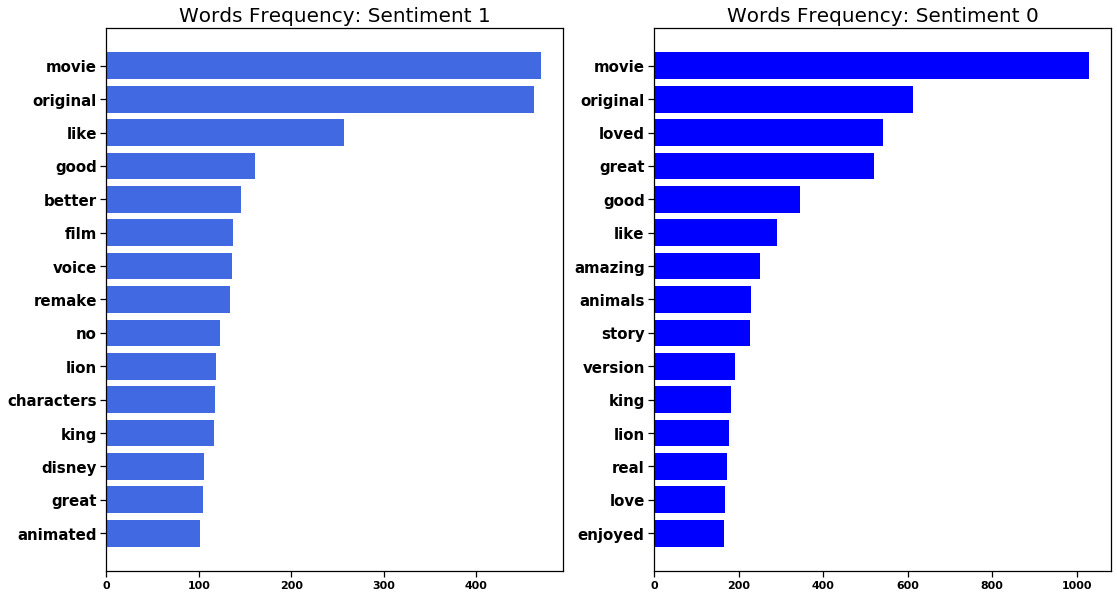

In [74]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold', 'size': 15}

plt.rc('font', **font)
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.barh(frequent_words_sentiment_df.loc[1,'values'][:15], frequent_words_sentiment_df.loc[1,'counts'][:15], color='royalblue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Sentiment 1', fontsize='20')

plt.subplot(1,2,2)
plt.barh(frequent_words_sentiment_df.loc[0,'values'][:15], frequent_words_sentiment_df.loc[0,'counts'][:15], color='blue')
plt.gca().invert_yaxis()
plt.title('Words Frequency: Sentiment 0', fontsize='20')
plt.yticks(fontsize=15)

plt.show()

#### Observations:
1. Generic words common to both Sentiment reviews cloud the differences between the classes (top words common to both: 'movie','original', 'like' etc.


2. Difference in count of occurences of key words:    

In [75]:
print('Count of "good" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='good')][0])
print('Count of "good" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='good')][0],'\n')
print('Count of "no" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='no')][0])
print('Count of "no" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='no')][0],'\n')
print('Count of "bad" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='bad')][0])
print('Count of "bad" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='bad')][0],'\n')
print('Count of "boring" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='boring')][0])
print('Count of "boring" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='boring')][0],'\n')
print('Count of "lacked" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='lacked')][0])
print('Count of "lacked" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='lacked')][0],'\n')

Count of "good" in Sentiment-1: 161
Count of "good" in Sentiment-0: 345 

Count of "no" in Sentiment-1: 123
Count of "no" in Sentiment-0: 51 

Count of "bad" in Sentiment-1: 55
Count of "bad" in Sentiment-0: 24 

Count of "boring" in Sentiment-1: 49
Count of "boring" in Sentiment-0: 7 

Count of "lacked" in Sentiment-1: 48
Count of "lacked" in Sentiment-0: 15 



### Word Frequency of Pure Negative, Pure Positive tokens of the Sentiment groups
- To better understand the divergence of the sentiments established between the two groups, we must remove the intersecting tokens present in both classes.

In [76]:
# Review Words in sentiment=1 not in sentiment=0
neg_tokens = list(set(frequent_words_sentiment_df.loc[1,'values'])-set(frequent_words_sentiment_df.loc[0,'values']))
# 1136 Pure Negative Words found

neg_index = np.array([list(frequent_words_sentiment_df.loc[1,'values']).index(i) for i in neg_tokens])  # index location
neg_counts = frequent_words_sentiment_df.loc[1,'counts'][neg_index] # counts of words
neg_tokens = np.array(neg_tokens)

# Sort Tokens by Descending Count order
index = np.argsort(-neg_counts)
neg_counts = neg_counts[index]
neg_tokens = neg_tokens[index]

# Review Words in sentiment=0 not in sentiment=1
pos_tokens = list(set(frequent_words_sentiment_df.loc[0,'values'])-set(frequent_words_sentiment_df.loc[1,'values']))
# 1136 Pure positive Words found

pos_index = np.array([list(frequent_words_sentiment_df.loc[0,'values']).index(i) for i in pos_tokens])  # index location
pos_counts = frequent_words_sentiment_df.loc[0,'counts'][pos_index] # counts of words
pos_tokens = np.array(pos_tokens)

# Sort Tokens by Descending Count order
index = np.argsort(-pos_counts)
pos_counts = pos_counts[index]
pos_tokens = pos_tokens[index]

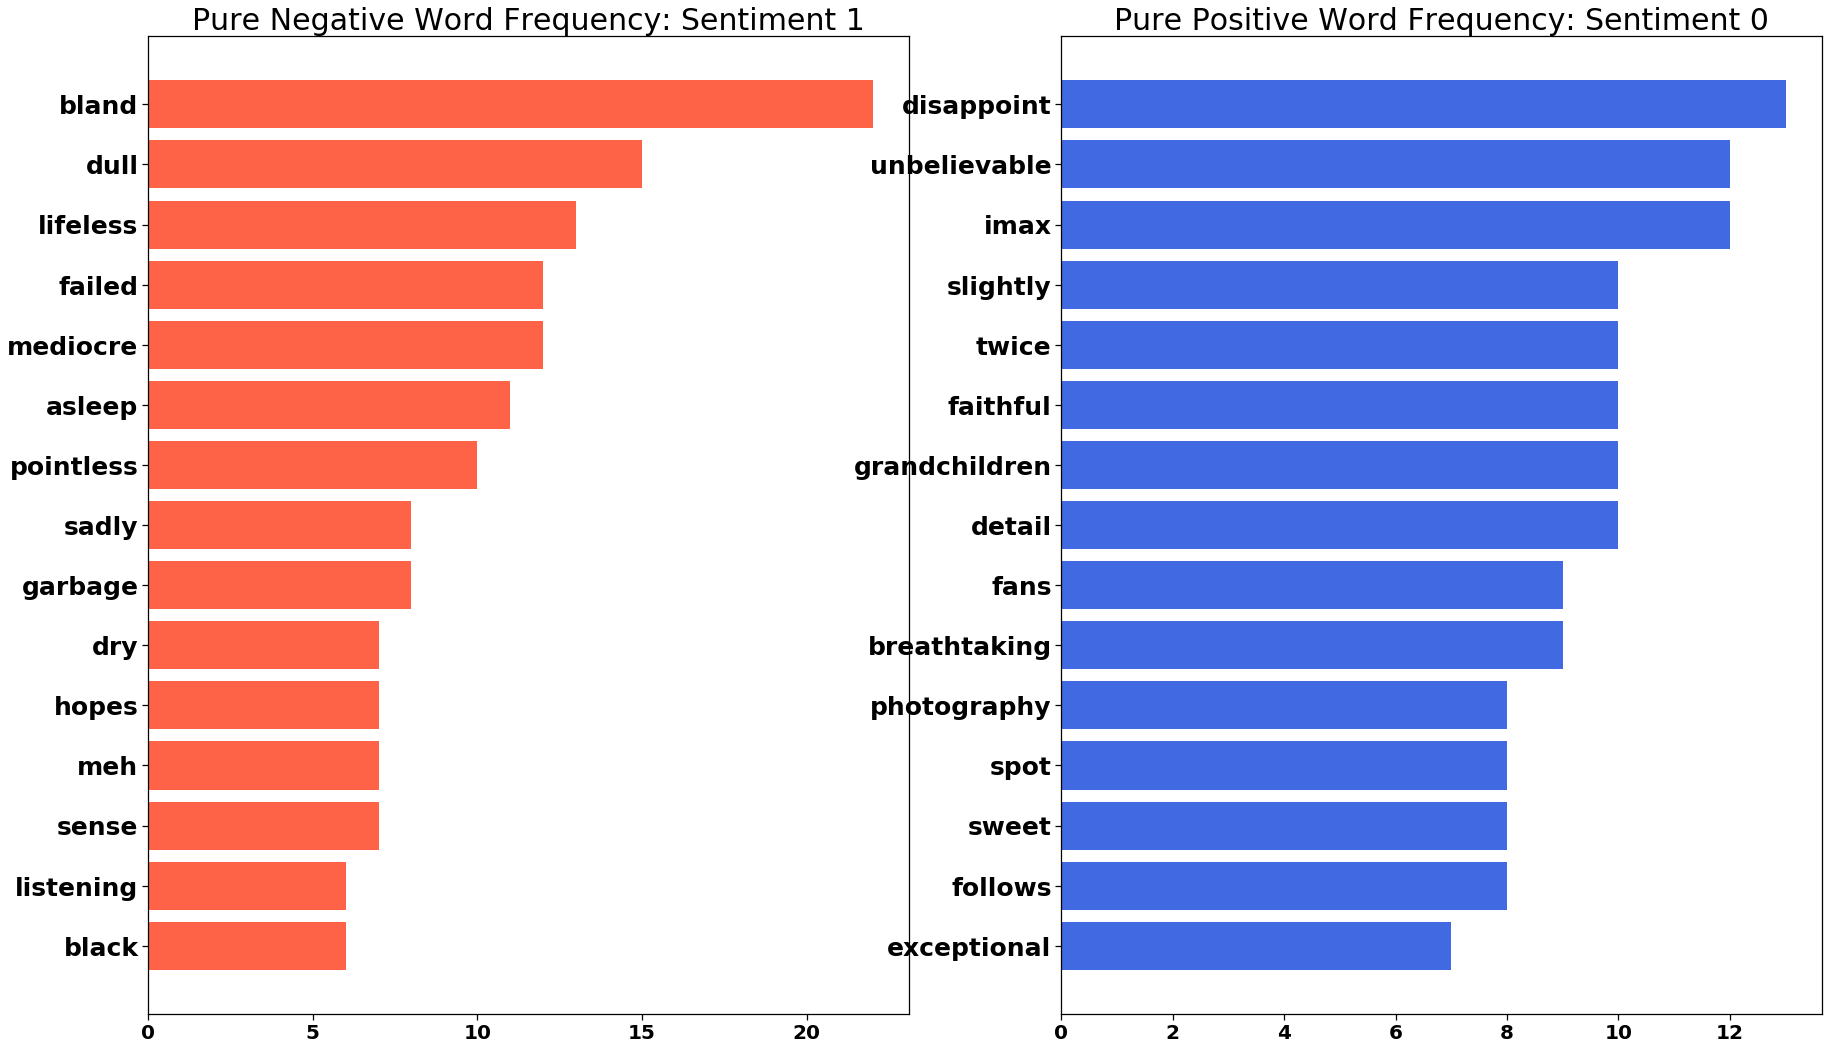

In [77]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold'}

plt.rc('font', **font)
plt.figure(figsize=(30,18))

plt.subplot(1,2,1)
plt.barh(neg_tokens[:15], neg_counts[:15], color='tomato')
plt.gca().invert_yaxis()
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('Pure Negative Word Frequency: Sentiment 1', fontsize='30')

plt.subplot(1,2,2)
plt.barh(pos_tokens[:15], pos_counts[:15], color='royalblue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('Pure Positive Word Frequency: Sentiment 0', fontsize='30')

plt.show()

In [78]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string
data['clean_review_stemmed'] = [' '.join(text) for text in data['clean_review_stemmed']]
data['clean_review_lemmatized'] = [' '.join(text) for text in data['clean_review_lemmatized']]

In [79]:
data['clean_review_lemmatized'][0]

'movie good original animate version place heart like update version screw critic like movie shot shot movie difference anybody tired movie look good low rating care diferent opinion mean valid'

### Creating the `tfidf_matrix`

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters

# max_df : cutoff to exclude highly populated words in all doc eg: stopwords
# min_df : cutoff to exclude highly rare words in all doc eg: rarewords, no semantic value across corpus
# ngram_range : type of ngrams to include (min_ngram, max_ngram) (default=(1, 1))
# max_features : features dimension cutoff
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1500,  #(0.05, 0.001)
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,1))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_review_lemmatized'])

print(tfidf_matrix.shape)

(3000, 3)


In [81]:
# Terms: Main latent themes of the Text
# vocabulary_: Main latent Features of the Text
# tfidf_vectorizer.vocabulary_

terms = tfidf_vectorizer.get_feature_names()
terms

['love', 'movie', 'original']

In [82]:
tfidf_matrix.todense()  # todense() : Return a dense matrix representation of matrix.

matrix([[0.        , 0.96016386, 0.27943757],
        [0.        , 0.        , 1.        ],
        [0.        , 0.65160949, 0.75855459],
        ...,
        [0.        , 0.        , 0.        ],
        [0.48056031, 0.        , 0.87696168],
        [1.        , 0.        , 0.        ]])

Unsupervised Learning
-------
### 1. K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [83]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist    #cluster distance
import joblib
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=123)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)
    

In [84]:
Sum_of_squared_distances

[1373.8660768435293,
 882.4282198684449,
 507.15094897309336,
 197.32066948035003,
 124.82968052826068]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


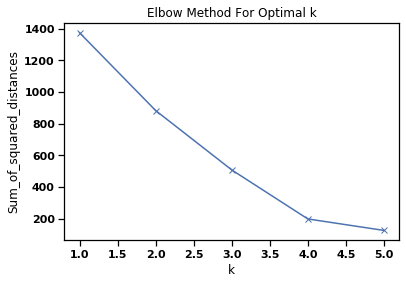

In [85]:
# Plot the elbow

# Distortion, on the y-axis, corresponds to our cost function: 
# the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

# As K increases the corresponding distortion value will tend to zero, 
# because you end up having just one data point per cluster. With only one data point in per cluster, 
# the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [86]:
# Based on Elbow cure, we choose 4 clusters
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

the cluster centers are [[0.03579355 0.97705253 0.04971069]
 [0.         0.         0.        ]
 [0.01508697 0.22601083 0.91680239]
 [0.88066786 0.21829916 0.13143605]]


### Getting the top words from each cluster

In [87]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.03579355 0.97705253 0.04971069]
 [0.         0.         0.        ]
 [0.01508697 0.22601083 0.91680239]
 [0.88066786 0.21829916 0.13143605]]
(4, 3)


In [88]:
# Sort Index of original list
km.cluster_centers_.argsort()

array([[0, 2, 1],
       [0, 1, 2],
       [0, 1, 2],
       [2, 1, 0]], dtype=int64)

In [89]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[1, 2, 0],
       [2, 1, 0],
       [2, 1, 0],
       [0, 1, 2]], dtype=int64)

In [90]:
print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] # Reverse the ndarray column order, returns same 'n' col array
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['movie'],['original'],['love'],
Top words in Cluster-1 :
['original'],['movie'],['love'],
Top words in Cluster-2 :
['original'],['movie'],['love'],
Top words in Cluster-3 :
['love'],['movie'],['original'],

In [91]:
data['cluster_group'] = clusters
# data.pop('clean_text', None)
data.head()

,review,sentiment,word_count,clean_review_stemmed,clean_review_lemmatized,clean_review_tokenized,review_lemmatized,review_stemmed,review_tokenized,cluster_group
userId,,,,,,,,,,
D91306B7-6A67-4117-B384-6A35AF00C176,this movie is good the original animated ver...,0,86,movi good origin anim version place heart like...,movie good original animate version place hear...,"[movie, good, original, animated, version, pla...","[this, movie, be, good, the, original, animate...","[this, movi, is, good, the, origin, anim, vers...","[this, movie, is, good, the, original, animate...",0
ff222e0c-e396-4d62-9e6a-82529303cb75,followed the original story which i was skepti...,0,12,follow origin stori skeptic enjoy,follow original story skeptical enjoy,"[followed, original, story, skeptical, enjoyed]","[follow, the, original, story, which, i, be, s...","[follow, the, origin, stori, which, i, was, sk...","[followed, the, original, story, which, i, was...",2
798014537,unlike some other disney remakes this one is ...,1,70,unlik disney remak pretti exact origin moment ...,unlike disney remake pretty exact original mom...,"[unlike, disney, remakes, pretty, exact, origi...","[unlike, some, other, disney, remake, this, on...","[unlik, some, other, disney, remak, this, one,...","[unlike, some, other, disney, remakes, this, o...",2
c64b8b43-5e68-41be-b3ec-89b41ec767e4,loved the movie the music was and is great ...,0,20,love movi music great like live action,love movie music great like live action,"[loved, movie, music, great, liked, live, action]","[love, the, movie, the, music, be, and, be, gr...","[love, the, movi, the, music, was, and, is, gr...","[loved, the, movie, the, music, was, and, is, ...",3
685f2a19-f581-43a6-bdbd-6db9e12a14fc,it was a well made movie i,0,8,movi,movie,[movie],"[-PRON-, be, a, well, make, movie, i]","[it, was, a, well, made, movi, i]","[it, was, a, well, made, movie, i]",0


In [92]:
data.keys()

Index(['review', 'sentiment', 'word_count', 'clean_review_stemmed',
       'clean_review_lemmatized', 'clean_review_tokenized',
       'review_lemmatized', 'review_stemmed', 'review_tokenized',
       'cluster_group'],
      dtype='object')

In [93]:
cluster_df = pd.DataFrame(data)

In [94]:
cluster_df['cluster_group'].value_counts()

1    1038
0     699
2     647
3     616
Name: cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [95]:
cluster_df.groupby('sentiment')['cluster_group'].value_counts()

sentiment  cluster_group
0          1                732
           3                576
           0                496
           2                366
1          1                306
           2                281
           0                203
           3                 40
Name: cluster_group, dtype: int64

In [96]:
##Step 1
cluster_df['clean_review_tokenized'] = [text.split(' ') for text in cluster_df['clean_review_lemmatized']]

In [97]:
##Step 2: Create pandas SeriesGroupBy object
## Fetch entire tokenized text for specific group
grouped_text = cluster_df.groupby('cluster_group')['clean_review_tokenized']

In [98]:
from itertools import chain

In [99]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [100]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    # eg: returns an 1D array of unique words from tokenized reviews
    # chain() constructor taking a single iterable argument that evaluates lazily;
    
    sorted_indices = np.argsort(-counts)  # returns indices of sorted list in reversed order
    # Create Cluster df of values(word list) sorted by counts 
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [101]:
frequent_words_df.head()  # words sorted by counts order

,cluster_id,counts,values
0,0,"[1027, 214, 193, 187, 105, 98, 94, 90, 88, 84,...","[movie, great, good, like, watch, animal, orig..."
1,1,"[179, 175, 157, 106, 101, 99, 82, 82, 70, 69, ...","[great, like, good, animal, amazing, story, re..."
2,2,"[851, 292, 222, 207, 154, 138, 124, 122, 116, ...","[original, movie, like, good, film, remake, vo..."
3,3,"[700, 255, 143, 119, 105, 75, 72, 67, 64, 60, ...","[love, movie, original, great, like, lion, ani..."


### Plotting Top Words in Clusters 0, 1, 2, 3

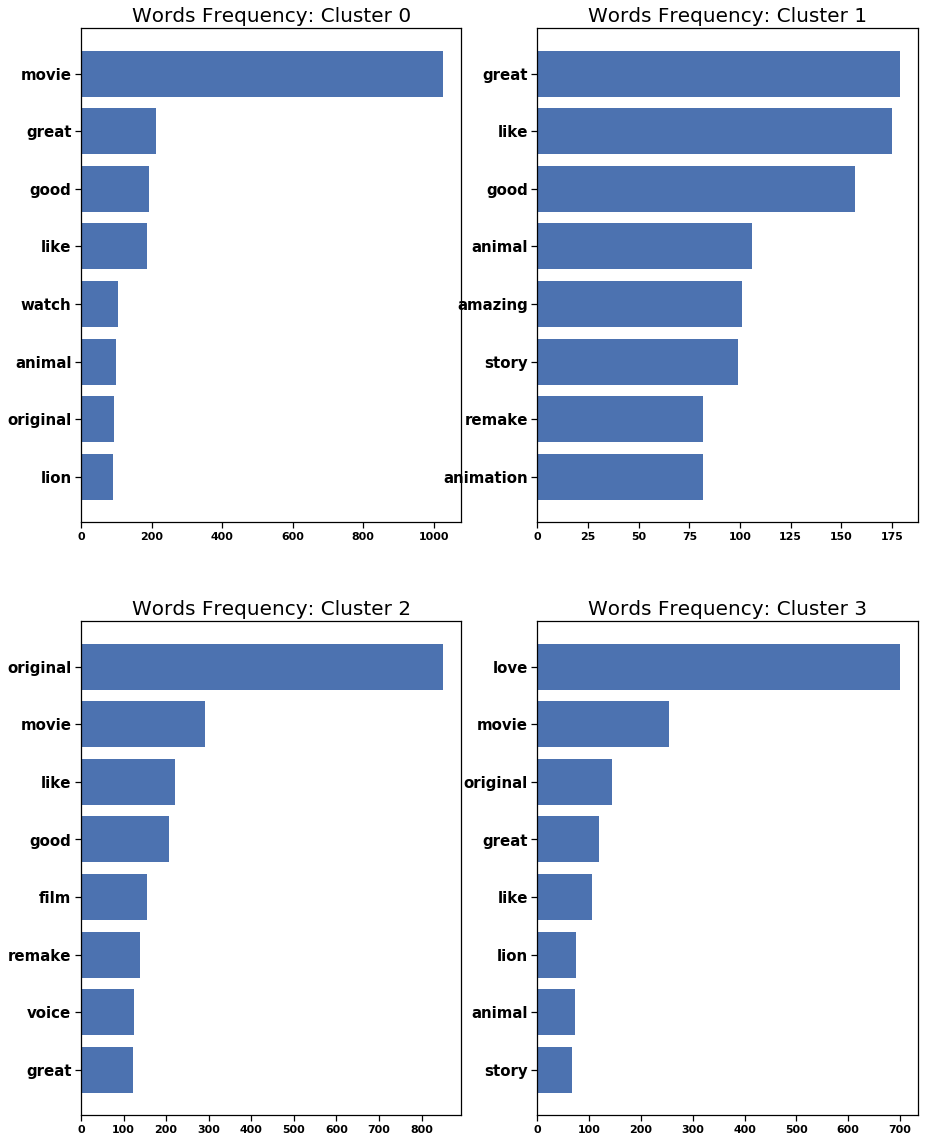

In [102]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:8], frequent_words_df.loc[0,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 0', fontsize=20)

plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:8], frequent_words_df.loc[1,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 1', fontsize=20)

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:8], frequent_words_df.loc[2,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 2', fontsize=20)

plt.subplot(2,2,4)
plt.barh(frequent_words_df.loc[3,'values'][:8], frequent_words_df.loc[3,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 3', fontsize=20)

plt.show()

#### Observations:
Words/Themes populated in the Clusters' Reviews describe:

Cluster 0: describes 'love' for the movie, again consisting of potentially shorter reviews

Cluster 1: positive adjectives like 'great', 'like' etc

Cluster 2: 'movie', also consist of possible shorter reviews that describe the movie in 1 sentence

Cluster 3: talks about originality of the movie/remake of the 2019 Lion King version

###   2. Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn
Topic Modelling by Matrix Decomposition

Upon Truncated SVD processing, we obtain 2 Matrices

1. U ∈ ℝ^(m ⨉ t) emerges as our Document-specific Topic allocation matrix  : m-document vector, t-topic
2. V ∈ ℝ^(n ⨉ t) becomes our Topic-specific Term allocation matrix  : n-term vector, t-topic

<u>In both U and V, the columns correspond to one of our t topics. </u>

#### Import Libraries

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1500,  #(0.05, 0.001)
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,1))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_review_lemmatized'])

print(tfidf_matrix.shape)

(3000, 3)


In [104]:
from sklearn.decomposition import TruncatedSVD

In [105]:
# Importing tfidf vectorized documents
print(tfidf_matrix.shape)
tfidf_matrix.todense()

(3000, 3)


matrix([[0.        , 0.96016386, 0.27943757],
        [0.        , 0.        , 1.        ],
        [0.        , 0.65160949, 0.75855459],
        ...,
        [0.        , 0.        , 0.        ],
        [0.48056031, 0.        , 0.87696168],
        [1.        , 0.        , 0.        ]])

### Creating the `svd_matrix` from the `tfidf_matrix`

In [106]:
# Select No. of Latent Themes to extract from text
n_components = 2
svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=20,
             random_state=143, tol=0.0)

In [107]:
# explained_variance_ratio_
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"Total Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")

# singular_values_  : explains the Top 2 Latent Topics found in Text
print(f"The singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.29173502 0.3830367 ]
Total Explained Variance : 67.48 %
The singular values are [31.05889539 23.21106784]


i.e
C-1 explains 30% of variation\
C-2 explains 38% of variation

### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [108]:
# Components describe the Theme of Text (represented by Singular Values, Singular Vectors)
# Theme = 2, 
svd_model.components_

array([[ 0.29933712,  0.84659996,  0.44007477],
       [ 0.04572337, -0.47342075,  0.87964889]])

In [109]:
# Term vs Topic Strength
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")  # Expl
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.29933712 0.84659996 0.44007477] and shape is (3,)
Topic 0: 
movie -- 0.8465999579544627
original -- 0.44007476736593937
love -- 0.29933711817834313
 
The component is [ 0.04572337 -0.47342075  0.87964889] and shape is (3,)
Topic 1: 
original -- 0.8796488906374453
love -- 0.04572337221063354
movie -- -0.47342074567344294
 


### Tagging each document with a topic
### Creating the `doc_topic_matrix`
`doc_topic_matrix` is the resultant SVD Output

In [110]:
# 2 Singular Values, 2 Components (Eigenvalues, Eigenvectors - Strength of Variation)
# Documents - 3000, Topic - 2
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print(doc_topic_matrix,'\n')

svd_categories = np.argmax(doc_topic_matrix, axis=1)  # Returns the indices of the maximum values along an axis.
print(doc_topic_matrix.shape,'\n')
print(svd_categories)

[[ 0.93584811 -0.20875454]
 [ 0.44007477  0.87964889]
 [ 0.88547331  0.35877625]
 ...
 [ 0.          0.        ]
 [ 0.52977825  0.79339121]
 [ 0.29933712  0.04572337]] 

(3000, 2) 

[0 1 0 ... 0 1 0]


In [111]:
data['SVD_group'] = svd_categories

In [112]:
pd.DataFrame(data).head(6)

,review,sentiment,word_count,clean_review_stemmed,clean_review_lemmatized,clean_review_tokenized,review_lemmatized,review_stemmed,review_tokenized,cluster_group,SVD_group
userId,,,,,,,,,,,
D91306B7-6A67-4117-B384-6A35AF00C176,this movie is good the original animated ver...,0,86,movi good origin anim version place heart like...,movie good original animate version place hear...,"[movie, good, original, animate, version, plac...","[this, movie, be, good, the, original, animate...","[this, movi, is, good, the, origin, anim, vers...","[this, movie, is, good, the, original, animate...",0,0
ff222e0c-e396-4d62-9e6a-82529303cb75,followed the original story which i was skepti...,0,12,follow origin stori skeptic enjoy,follow original story skeptical enjoy,"[follow, original, story, skeptical, enjoy]","[follow, the, original, story, which, i, be, s...","[follow, the, origin, stori, which, i, was, sk...","[followed, the, original, story, which, i, was...",2,1
798014537,unlike some other disney remakes this one is ...,1,70,unlik disney remak pretti exact origin moment ...,unlike disney remake pretty exact original mom...,"[unlike, disney, remake, pretty, exact, origin...","[unlike, some, other, disney, remake, this, on...","[unlik, some, other, disney, remak, this, one,...","[unlike, some, other, disney, remakes, this, o...",2,0
c64b8b43-5e68-41be-b3ec-89b41ec767e4,loved the movie the music was and is great ...,0,20,love movi music great like live action,love movie music great like live action,"[love, movie, music, great, like, live, action]","[love, the, movie, the, music, be, and, be, gr...","[love, the, movi, the, music, was, and, is, gr...","[loved, the, movie, the, music, was, and, is, ...",3,0
685f2a19-f581-43a6-bdbd-6db9e12a14fc,it was a well made movie i,0,8,movi,movie,[movie],"[-PRON-, be, a, well, make, movie, i]","[it, was, a, well, made, movi, i]","[it, was, a, well, made, movie, i]",0,0
db558a10-7aa3-4980-919c-2e786dbf619d,they took all of the puns out they took the ...,1,43,took pun took funni light heart joke destroy s...,take pun take funny light hearted joke destroy...,"[take, pun, take, funny, light, hearted, joke,...","[-PRON-, take, all, of, the, pun, out, -PRON-,...","[they, took, all, of, the, pun, out, they, too...","[they, took, all, of, the, puns, out, they, to...",0,0


In [113]:
print(data.groupby('sentiment')['SVD_group'].value_counts())

sentiment  SVD_group
0          0            1865
           1             305
1          0             645
           1             185
Name: SVD_group, dtype: int64
